In [ ]:
!pip install praw transformers seaborn matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 3.7 MB/s eta 0:00:00


In [ ]:
from transformers import pipeline
import praw
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re



In [ ]:
!pip install python-dotenv
from dotenv import load_dotenv
import os

# Load .env file
load_dotenv("credentials.env")

# Access credentials
REDDIT_API_ID = os.getenv("REDDIT_API_ID")
REDDIT_API_SECRET = os.getenv("REDDIT_API_SECRET")
USER =

print(api_key, api_secret)  # Test


In [ ]:
def preprocess_comment_data(comments):
  # removing [deleted] , [removed] and special character strings from comments
  # applying regex for this
  comments = comments.replace("[deleted]", "").replace("[removed]", "")
  comments = re.sub(r'[^a-zA-Z0-9\s]', '', comments)
  return comments


In [ ]:

def fetch_reddit_data(subreddit_name, post_limit=10):
    """Fetch titles and comments from a subreddit."""
    reddit = praw.Reddit(
      client_id="iuc9kMiTOyNv1_ULj4V2tg",
      client_secret="d1R_qOtRmxwqUkfGB66ctvPtY6G0tw",
      user_agent="abdullah"
    )
    subreddit = reddit.subreddit(subreddit_name)
    posts_data = []

    for post in subreddit.hot(limit=post_limit):
        post_info = {
            "title": post.title,
            "comments": []
        }
        post.comments.replace_more(limit=0)
        for comment in post.comments.list()[:10]:
            post_info["comments"].append(comment.body)
        posts_data.append(post_info)

        # Preprocess comments
    for post in posts_data:
        post["comments"] = [preprocess_comment_data(comment) for comment in post["comments"]]

    return posts_data






In [ ]:
def perform_sentiment_analysis(posts_data , subreddit_name):
    """Perform sentiment analysis using Hugging Face Transformers, with summarization for long comments."""

    # Sentiment analysis model
    sentiment_model = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english", tokenizer="distilbert-base-uncased-finetuned-sst-2-english")

    # Summarization model
    summarizer = pipeline("summarization", model="utrobinmv/t5_summary_en_ru_zh_base_2048")

    analysis_results = []

    for post in posts_data:
        # Analyze comments
        for comment in post["comments"]:
            # Check if the comment exceeds 512 tokens
            tokenized_comment = sentiment_model.tokenizer(comment, truncation=False, return_tensors="pt")
            print(len(tokenized_comment['input_ids'][0]))
            while len(tokenized_comment["input_ids"][0]) > 512:
                print(len(tokenized_comment['input_ids'][0]))
                # Summarize the comment to fit within the token limit
                summary = summarizer(comment, max_length=512, min_length=100, do_sample=False)
                comment = summary[0]["summary_text"]  # Replace comment with its summary
                tokenized_comment = sentiment_model.tokenizer(comment, truncation=False, return_tensors="pt")
                # print("After Summary")
                # print(len(tokenized_comment['input_ids'][0]))

                # print("Summarized Comment")
                # print(comment)

            # Perform sentiment analysis
            comment_sentiment = sentiment_model(comment)
            analysis_results.append({
                "text": comment,
                "type": "Comment",
                "label": comment_sentiment[0]['label'],
                "score": comment_sentiment[0]['score'],
                "subreddit" : subreddit_name
            })

    return pd.DataFrame(analysis_results)

In [ ]:
def visualize_sentiments(sentiments_df):
    """Visualize sentiment distribution."""
    sns.set(style="whitegrid")

    # Countplot for sentiment distribution
    plt.figure(figsize=(10, 6))
    sns.countplot(data=sentiments_df, x="label", hue="type", palette="viridis")
    plt.title("Sentiment Distribution")
    plt.xlabel("Sentiment")
    plt.ylabel("Count")
    plt.legend(title="Text Type")
    plt.show()

    # Sentiment score distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(data=sentiments_df, x="score", hue="label", kde=True, palette="coolwarm", bins=30)
    plt.title("Sentiment Score Distribution")
    plt.xlabel("Score")
    plt.ylabel("Density")
    plt.show()


Enter the subreddit topic: worldnews
Enter the number of posts to analyze: 10


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching data from r/worldnews...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

Performing sentiment analysis...


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/809 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.19G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/206 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/20.6k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.47M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.59k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

69
77
41
127
105
101
101


Token indices sequence length is longer than the specified maximum sequence length for this model (681 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (729 > 512). Running this sequence through the model will result in indexing errors


56
681
681
68
19
32
27
17
37
41
2
38
28
52
51
15
52
11
24
24
23
827
827
27
103
66
13
10
28
13
22
7
13
14
7
10
11
30
159
7
16
23
21
23
22
57
19
67
19
42
42
20
20
29
44
29
13
62
10
11
12
146
12
28
29
64
27
43
8
6
47
39
14
14
16
18
49
7
20
23
42
131
5
6
30
26
33
6
15
18
19
7
9
13
12
Visualizing sentiments...


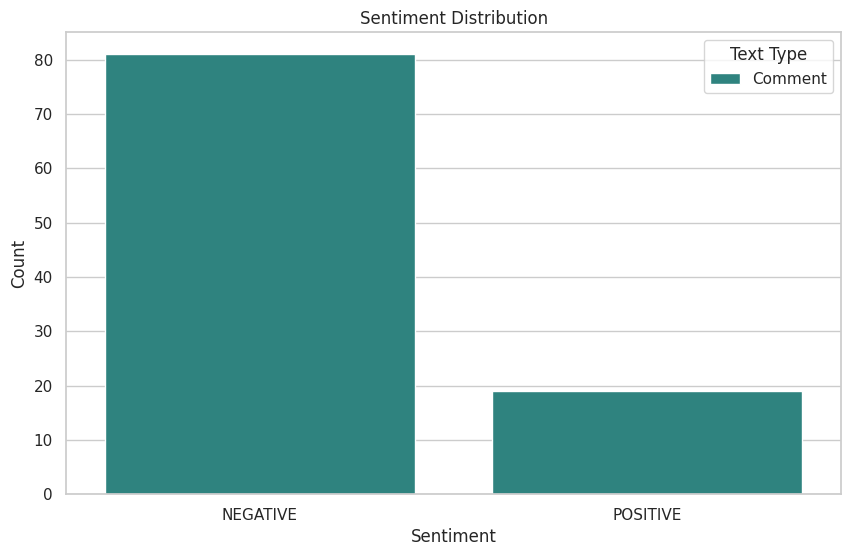

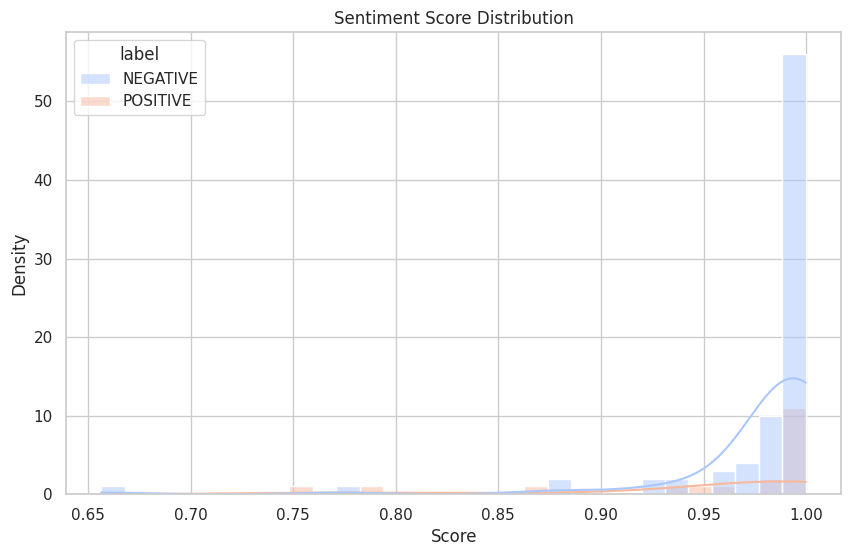

Analysis complete!


In [ ]:

def main():
    subreddit_name = input("Enter the subreddit topic: ").strip()
    post_limit = int(input("Enter the number of posts to analyze: ").strip())

    print(f"Fetching data from r/{subreddit_name}...")
    posts_data = fetch_reddit_data(subreddit_name, post_limit)

    # print(posts_data)

    post_data_df = pd.DataFrame(posts_data)
    post_data_df.to_csv("posts_data.csv", index=False)


    print("Performing sentiment analysis...")
    sentiments_df = perform_sentiment_analysis(posts_data , subreddit_name)
    sentiments_df.to_csv("sentiments_data.csv", index=False)


    print("Visualizing sentiments...")
    visualize_sentiments(sentiments_df)
    print("Analysis complete!")


main()

In [ ]:
post_dataa = pd.read_csv("posts_data.csv")
post_dataa.head(5)

,title,comments
0,/r/WorldNews Live Thread: Russian Invasion of ...,[' The EU will allocate 42 billion euros of ma...
1,/r/WorldNews Live Thread: Israel at War (Threa...,['Cant believe the amount of pro hamas clowns ...
2,Zelensky says he needs Nato guarantees before ...,['Why dont we just say were not gonna put Ukra...
3,Russians ‘Panic’ As Ukrainian Forces Fling 40 ...,['In a powerful coordinated strike on Friday t...
4,Putin approves new budget with record defense ...,['how much has been allocated for national off...


In [ ]:
sentiment_model = pipeline("sentiment-analysis" , model="cardiffnlp/twitter-roberta-base-sentiment-latest",  # Longformer model
tokenizer="allenai/longformer-base-4096")

result = sentiment_model("That thing is really cool")
print(result)

config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


config.json:   0%|          | 0.00/694 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

[{'label': 'positive', 'score': 0.9575923085212708}]


In [ ]:
from transformers import pipeline

# Load the summarization pipeline with a pre-trained model
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Example long text
long_text = """

War and Peace

War and peace are two opposing forces that have shaped human history and society. War, often born from conflict, territorial disputes, ideological differences, or power struggles, brings destruction, suffering, and loss. It tests the resilience of humanity, destroying lives and tearing apart the very fabric of communities. In the throes of war, nations pour their resources into battles, economies falter, and the innocent bear the brunt of the devastation. War, with its chaos and violence, is a reflection of humanity’s darker tendencies, showcasing a failure to resolve conflicts through dialogue and understanding. On the other hand, peace stands as a beacon of hope, a symbol of harmony and cooperation. Peace allows societies to flourish, cultures to evolve, and innovation to thrive. In times of peace, humanity can address pressing issues such as poverty, climate change, and technological advancement. It is during peace that the true potential of collective human effort is realized.

However, peace is not simply the absence of war; it requires deliberate effort, compromise, and mutual respect. Achieving and maintaining peace often demands sacrifices and a willingness to address grievances fairly. Historical peace agreements, such as the Treaty of Versailles or modern negotiations mediated by international organizations, demonstrate that peace is a dynamic, ongoing process rather than a permanent state. Yet, paradoxically, war has occasionally led to peace, as seen when revolutions have overthrown oppressive regimes or when international conflicts paved the way for global cooperation, such as the formation of the United Nations after World War II.

The interplay between war and peace underscores the dual nature of humanity — capable of immense destruction yet also profound healing and reconciliation. While war is often inevitable in the face of irreconcilable differences, it is peace that humanity ultimately strives for. A world in peace reflects our highest ideals: equality, coexistence, and prosperity for all. The challenge remains to bridge the gap between these two states, to learn from the past, and to forge a future where peace prevails over war as the dominant narrative of our existence.
"""

# Summarize the text
summary = summarizer(long_text, max_length=130, min_length=30, do_sample=False)

# Print the summarized text
print("Summary:", summary[0]["summary_text"])


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Summary: War and peace are two opposing forces that have shaped human history and society. War, with its chaos and violence, is a reflection of humanity’s darker tendencies. Peace allows societies to flourish, cultures to evolve, and innovation to thrive. A world in peace reflects our highest ideals: equality, coexistence, and prosperity for all.


In [ ]:
sentimentss = pd.read_csv('sentiments_data.csv')
sentimentss.head()

,text,type,label,score,subreddit
0,The EU will allocate 42 billion euros of macr...,Comment,NEGATIVE,0.979848,worldnews
1,Meanwhile the fire in Yekaterinburg Russia kee...,Comment,NEGATIVE,0.979606,worldnews
2,Commanders of Georgian units that are part of ...,Comment,NEGATIVE,0.878131,worldnews
3,Syrian Observatory Russian airstrikes on the U...,Comment,NEGATIVE,0.995788,worldnews
4,42nd Brigade\n\n Today the enemy launched a ma...,Comment,NEGATIVE,0.992177,worldnews


In [ ]:
!pip install snowflake-connector-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 kB 7.5 MB/s eta 0:00:00


In [ ]:
import snowflake.connector

# Set up your credentials
conn = snowflake.connector.connect(
    user='AHSHAAMABU',
    password='Pizza786!!!',
    account='dazugcq-oe54575',
    warehouse='COMPUTE_WH',
    database='REDDIT_COMMENT_ANALYSIS',
    schema='COMMENT_ANALYSIS'
)



# Example query
cursor = conn.cursor()
cursor.execute("SELECT CURRENT_VERSION()")
result = cursor.fetchone()
cursor.close()
conn.close()

print(result)


('8.44.2',)


In [ ]:
## Creating Table for storing Sentiment Data from df

sentimentss = pd.read_csv('sentiments_data.csv')

conn = snowflake.connector.connect(
    user='AhshaamAbu',
    password='Pizza786!!!',
    account='dazugcq-oe54575',
    warehouse='COMPUTE_WH',
    database='REDDIT_COMMENT_ANALYSIS',
    schema='COMMENT_ANALYSIS'
)

cursor = conn.cursor()
create_table_query = """
CREATE OR REPLACE TABLE comments_analysis (
    "text" STRING,
    "type" STRING,
    "label" STRING,
    "score" FLOAT
);
"""
cursor.execute(create_table_query)
cursor.close()
conn.close()

In [ ]:
from snowflake.connector.pandas_tools import write_pandas

def load_dataframe_to_snowflake(df):
    user='AhshaamAbu',
    password='Pizza786!!!',
    account='dazugcq-oe54575',
    warehouse='COMPUTE_WH',
    database='REDDIT_COMMENT_ANALYSIS',
    schema='COMMENT_ANALYSIS'
    table_name = 'COMMENTS_ANALYSIS'

    # Ensure the DataFrame is not empty
    if df.empty:
        print("The DataFrame is empty. No data to load.")
        return

    # Establish connection to Snowflake
    conn = snowflake.connector.connect(
      user='AhshaamAbu',
      password='Pizza786!!!',
      account='dazugcq-oe54575',
      warehouse='COMPUTE_WH',
      database='REDDIT_COMMENT_ANALYSIS',
      schema='COMMENT_ANALYSIS'
    )

    try:
        # Load the DataFrame into the Snowflake table
        success, nchunks, nrows, _ = write_pandas(conn, df, table_name)
        if success:
            print(f"Data successfully loaded into '{schema}.{table_name}'. Rows inserted: {nrows}")
        else:
            print("Failed to load data into Snowflake.")
    except Exception as e:
        print(f"An error occurred: {e}")
    finally:
        # Close the connection
        conn.close()


In [ ]:
load_dataframe_to_snowflake(sentimentss)

An error occurred: 000904 (42000): SQL compilation error: error line 1 at position 122
invalid identifier '"subreddit"'


In [ ]:
# Fetch the data from db

def fetch_data():
  conn = snowflake.connector.connect(
      user='AhshaamAbu',
      password='Pizza786!!!',
      account='dazugcq-oe54575',
      warehouse='COMPUTE_WH',
      database='REDDIT_COMMENT_ANALYSIS',
      schema='COMMENT_ANALYSIS'
  )

  cursor = conn.cursor();
  query = "SELECT * FROM COMMENTS_ANALYSIS"
  cursor.execute(query)
  result = cursor.fetchall()

  cursor.close()
  conn.close()

  return result

In [ ]:
result = fetch_data()

print(result[0])

IndexError: list index out of range

Enter the subreddit topic: music
Enter the number of posts to analyze: 20


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching data from r/music...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

Performing sentiment analysis...
34
20
5
7
18
28
34
33
12
7
42
34
22
15
14
20
6
9
9
25
213
16
16
34
22
13
6
23
20
15
39
6
16
3
42
5
4
6
5
41
29
6
4
4
9
10
10
46
10
14
56
170
9
5
10
7
3
17
20
20
18
27
37
51
21
31
18
8
68
18
37
21
12
63
30
7
59
39
90
10
19
8
4
8
3
30
8
10
6
25
21
42
18
25
6
5
2
27
27
18
21
6
61
9
7
6
7
52
42
46
7
14
19
102
13
26
11
39
35
9
7
5
21
18
11
6
14
58
33
57
11
12
21
17
21
48
39
45
30
98
4
5
10
12
28
17
4
Data successfully loaded into 'COMMENT_ANALYSIS.COMMENTS_ANALYSIS'. Rows inserted: 147
Visualizing sentiments...


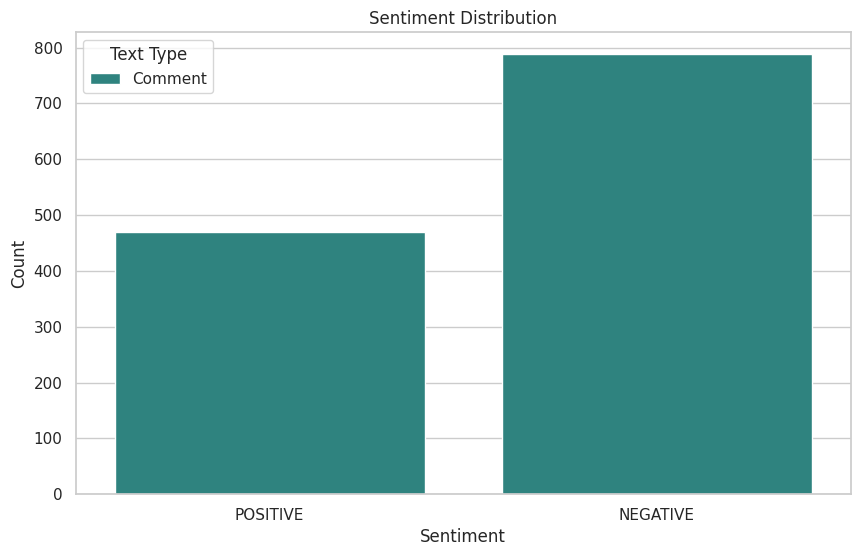

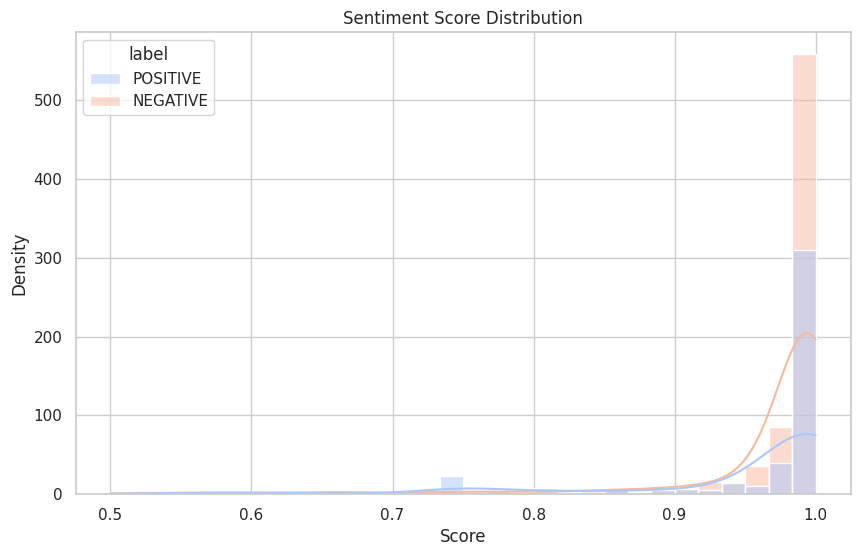

Analysis complete!


In [ ]:
def main():
    subreddit_name = input("Enter the subreddit topic: ").strip()
    post_limit = int(input("Enter the number of posts to analyze: ").strip())

    print(f"Fetching data from r/{subreddit_name}...")
    posts_data = fetch_reddit_data(subreddit_name, post_limit)

    # print(posts_data)

    post_data_df = pd.DataFrame(posts_data)
    post_data_df.to_csv("posts_data.csv", index=False)


    print("Performing sentiment analysis...")
    sentiments_df = perform_sentiment_analysis(posts_data , subreddit_name)

    load_dataframe_to_snowflake(sentiments_df)


    sentiment_results = fetch_data()

    #converting tuples in to dataframe
    sentiments_results_df = pd.DataFrame(sentiment_results, columns=['text', 'type', 'label', 'score' , 'reddit'])

    print("Visualizing sentiments...")
    visualize_sentiments(sentiments_results_df)
    print("Analysis complete!")


main()

In [ ]:
## Calling main